In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df_path = "../artifacts/data_ingestion/hotel_cancellation.csv"
df = pd.read_csv(df_path)

**About Dataset**
----------------

In [6]:
df.shape

(119390, 36)

In [7]:
df["hotel"].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [8]:
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
35272,Resort Hotel,0,4,2017,April,16,16,1,0,2,...,Transient,91.0,0,0,Check-Out,2017-04-17,Michael Parker,Michael_Parker93@yahoo.com,372-664-2813,************7027


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
isnull_mean = df.isna().mean() * 100
isnull_mean

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

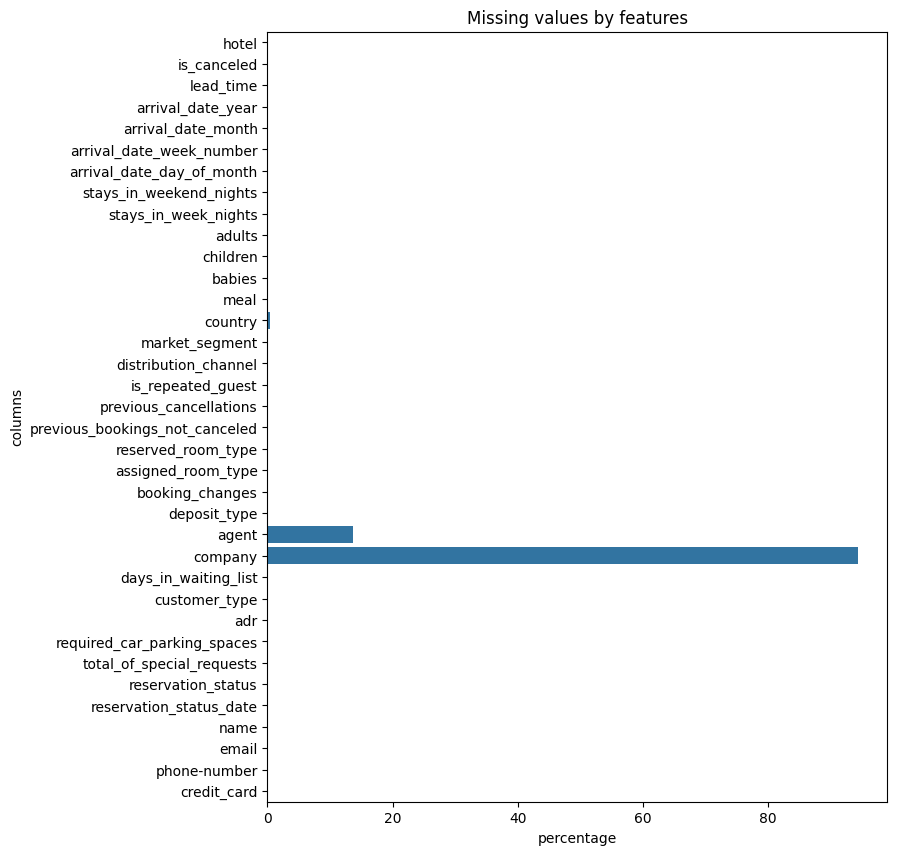

In [11]:
plt.figure(figsize=(8, 10))
sns.barplot(isnull_mean, orient="h")
plt.xlabel("percentage")
plt.ylabel("columns")
plt.title("Missing values by features")
plt.show()

Irrelevent features
-------------------

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [13]:
unwanted_columns = ["email", "phone-number", "credit_card", "name", "company"]
df = df.drop(columns=unwanted_columns)

Datatypes
---------

In [14]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [15]:
# need to change

# "children" -> int
# "agent" -> int
# "reservation_status_date" -> datetime

How to Impute Missing Values
----------------------------

In [16]:
missing_values_cols = isnull_mean[isnull_mean > 0]
missing_values_cols

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [17]:
missing_values_cols[missing_values_cols > 50]  # column to drop

company    94.306893
dtype: float64

In [18]:
df[["children", "country", "agent"]].dtypes

children    float64
country      object
agent       float64
dtype: object

In [19]:
"""impute with

SimpleImputer(mean)
-------------------
-> children
-> agent

SimpleImputer(mode)
-------------------
-> country

"""

'impute with\n\nSimpleImputer(mean)\n-------------------\n-> children\n-> agent\n\nSimpleImputer(mode)\n-------------------\n-> country\n\n'

# Outlier Checking

In [20]:
numerical_cols = df.select_dtypes(np.number)
categorical_cols = df.select_dtypes("O")

### Continues variables

In [21]:
# numerical columns that have cardinality > 50
# categorize as continues variable

continues_variables = [
    column for column in numerical_cols.columns if df[column].nunique() > 50
]

# these variables are most likly discrete with there nature
continues_variables.remove("previous_bookings_not_canceled")
continues_variables.remove("days_in_waiting_list")
continues_variables

['lead_time', 'arrival_date_week_number', 'agent', 'adr']

In [22]:
df[continues_variables].sample(10)

,lead_time,arrival_date_week_number,agent,adr
31639,62,53,NaN,156.00
51095,276,20,21.0,61.00
67547,143,18,151.0,100.00
92684,80,28,85.0,82.45
71251,15,26,9.0,230.00
46137,8,51,9.0,160.83
76354,273,29,6.0,109.00
53494,24,26,9.0,157.00
11610,60,21,NaN,50.00
25251,50,25,251.0,78.00


### Distrubution of continues variables

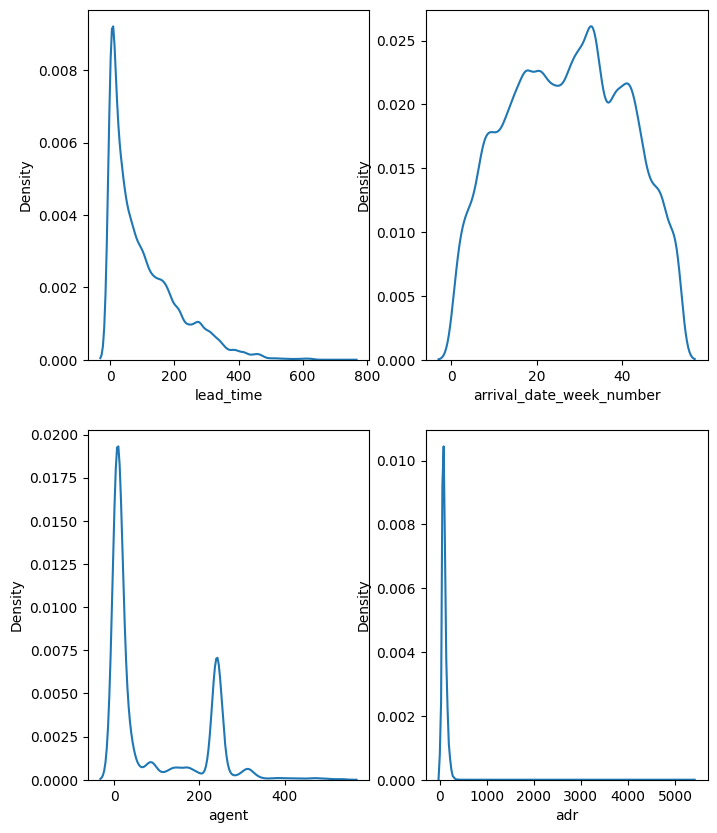

In [23]:
plt.figure(figsize=(8, 10))

for index, column in enumerate(continues_variables, start=1):
    plt.subplot(2, 2, index)
    sns.kdeplot(df[column])

In [24]:
df[continues_variables].skew()

lead_time                    1.346550
arrival_date_week_number    -0.010014
agent                        1.089386
adr                         10.530214
dtype: float64

In [25]:
"""
column_name -> outlier treat method
------------------------------------
lead_time ->  log
arrival_date_week_number -> IQR
agent -> log
adr -> log
"""

'\ncolumn_name -> outlier treat method\n------------------------------------\nlead_time ->  log\narrival_date_week_number -> IQR\nagent -> log\nadr -> log\n'

### Label Encoding

In [ ]:
2: hotel: label encoder
12: arrival_date_month: label encoder
5: meal: label encoder
8: market_segment: label encoder
5: distributed_channel: label encoder
10: reserved_room_type: label encoder
12: assigned_room_type: label encoder
3: reservation_status: label encoder
4: customer_type: label encoder
3: deposit_type: label encoder

In [ ]:
177: country: Target Encoding

In [30]:
df.select_dtypes("O").columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')